# Центральная предельная теорема своими руками (C1W4)

Импортируем все необходимые библиотеки, отключим предупреждения (в plt.hist() параметр normed вызывает warning deprecated).

In [14]:
from scipy import stats as sts
from matplotlib import pylab as plt
import numpy as np
import math
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Исследуемое непрерывное распределение - экспоненциальное.
Функция распределения:
$$ F(x, \lambda) = 
            \begin{cases}
                1-e^{-\lambda x}, & \mbox{x} \geqslant \mbox{0},
                \\0, & \mbox{x} < \mbox{0}.
            \end{cases}$$
            
Плотность:
$$ f(x, \lambda) = 
            \begin{cases}
                \lambda e^{-\lambda x}, & \mbox{x} \geqslant \mbox{0},
                \\0, & \mbox{x} < \mbox{0}.
            \end{cases}$$
            
Выберем параметр $ \lambda = 3$.
На основе выборки объема 1000 построим гистограмму и дополнительно нарисуем теоретическую плотность распределения случайной величины.

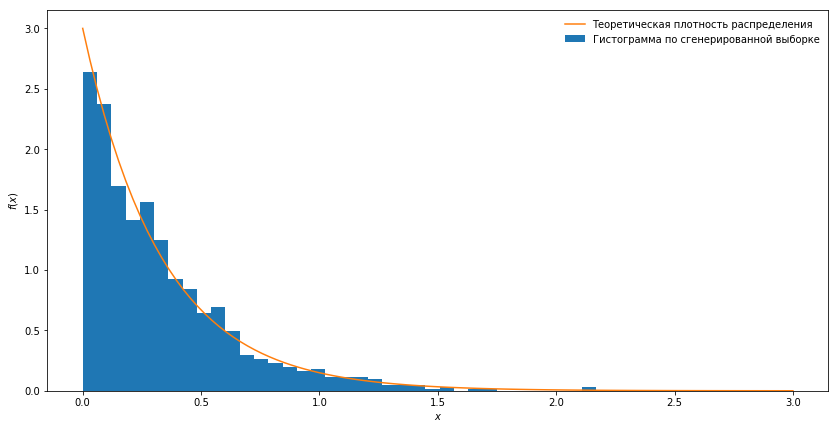

In [16]:
lambda_par = 3.
expon_rv = sts.expon(scale=1/lambda_par)
sample = expon_rv.rvs(1000)

x = np.linspace(0,3,100)
pdf = expon_rv.pdf(x)

plt.figure(figsize=(14,7))
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.hist(sample, bins=36, normed=True, label=u'Гистограмма по сгенерированной выборке')
plt.plot(x, pdf, label=u'Теоретическая плотность распределения')
plt.legend(loc='best', frameon=False)

plt.show()

Напишем функцию means_distr, которая:
* генерирует 1000 выборок объёма n для экспоненциального распределения с параметром $ \lambda = \mbox{lambda_par}$
* строит гистограммы выборочных средних
* строит график плотности соответствующего нормального распределения

$$ \overline{X_n} \approx \sim N(EX, \frac{DX}{n}) $$

Для экспоненциального распределения:
$$ EX = \frac{1}{\lambda} $$
$$ DX = \frac{1}{\lambda^2} $$

Таким образом:
$$ \overline{X_n} \approx \sim N(\frac{1}{\lambda}, \frac{1}{n\lambda^2}) $$

Так как функция sts.norm() принимает на вход не дисперсию, а среднеквадратичное отклонение, то будем вызывать ее с параметрами $ \frac{1}{\lambda} $ и $\sqrt{\frac{1}{n\lambda^2}}$

In [39]:
def means_distr(n, lambda_par):
    samples_vect = expon_rv.rvs(n*1000)
    samples_matr = samples_vect.reshape(1000, n)
    means = samples_matr.mean(axis=1)
    
    expectation = 1/lambda_par
    stand_deviation = math.sqrt(1/(lambda_par**2*n))
    
    norm_rv = sts.norm(expectation, stand_deviation)
    x = np.linspace(0,1,200)
    pdf = norm_rv.pdf(x)
    
    plt.figure(figsize=(12,6))
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.hist(means, bins=14, normed=True, label=u"Гистограмма выборочных средних".format(n))
    plt.plot(x, pdf, label=u'Теоретическая плотность распределения')
    plt.legend(loc='best', frameon=False)
    
    plt.show()

Для n=5

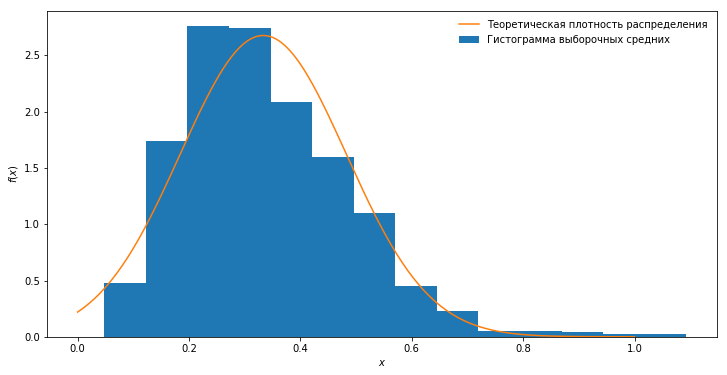

In [40]:
means_distr(5, lambda_par)

Для n=10

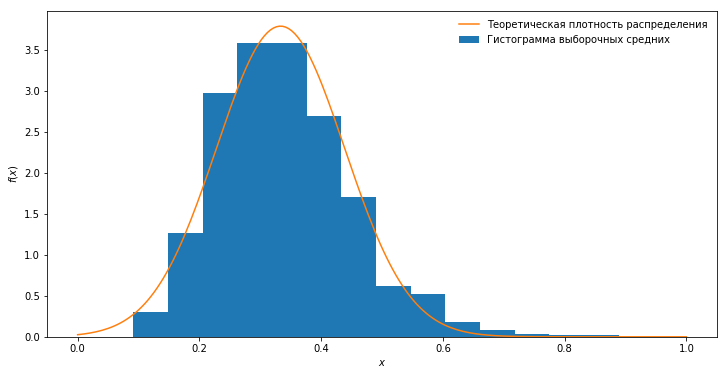

In [41]:
means_distr(10, lambda_par)

Для n=100

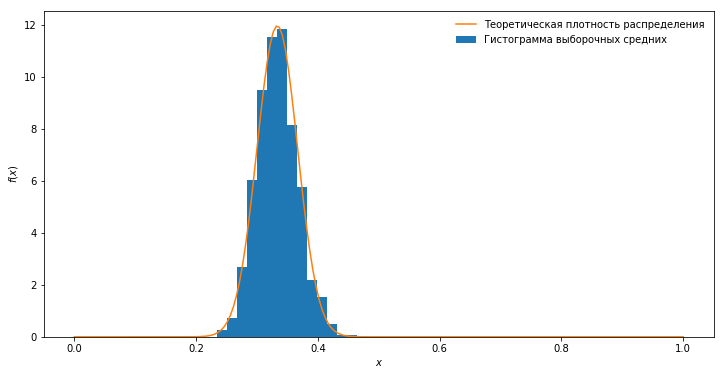

In [52]:
means_distr(100, lambda_par)

**Выводы:** 
1. С увеличением n математическое ожидание выборки средних приближается к теоретическому значению ($ \frac{1}{\lambda} = \frac{1}{3} $)
2. С увеличением n дисперсии сгенерированных выборок средних, а также соответствующих теоретических нормальных распределений уменьшались, а следовательно, уменьшался и разброс средних около математичского ожидания.
3. С увеличением n увеличивалось и соответствие распределения выборочных средних с теоретическим нормальным распределением, определенным согласно центральной предельной теореме.